<a href="https://colab.research.google.com/github/ngupta23/gre/blob/master/evaluations/python/nlp/zero_shot_pipeline_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero Shot Learning for Topic Classification
Article: https://towardsdatascience.com/zero-shot-text-classification-with-hugging-face-7f533ba83cd6

In [1]:
!pip install git+https://github.com/huggingface/transformers.git
!pip install GetOldTweets3

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-asbh_829
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-asbh_829
  Created wheel for transformers: filename=transformers-3.0.2-cp36-none-any.whl size=868795 sha256=6d193ed502a4ff82c4202be47d68460f38f47d958d20aa582d6ab4adbdb48b2d
  Stored in directory: /tmp/pip-ephem-wheel-cache-yej0_fin/wheels/33/eb/3b/4bf5dd835e865e472d4fc0754f35ac0edb08fe852e8f21655f
Successfully built transformers


In [2]:
import GetOldTweets3 as got
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from transformers import pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import transformers
transformers.__version__

'3.0.2'

In [4]:
classifier = pipeline("zero-shot-classification")

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
# Function that pulls tweets based on a general search query

# Parameters: (text query you want to search), (max number of most recent tweets to pull from)
def text_query_to_df(text_query, count):
    # Creation of query object
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(text_query)\
                                                .setMaxTweets(count).setLang('en')
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)

    # Creating list of chosen tweet data
    text_tweets = [[tweet.date, tweet.text] for tweet in tweets]

    # Creation of dataframe from tweets
    tweets_df = pd.DataFrame(text_tweets, columns = ['Datetime', 'Text'])

    return tweets_df

# Input search query to scrape tweets and name csv file
# Max recent tweets pulls x amount of most recent tweets from that user
txt = 'climate fight'
max_recs = 10

# Calling function to query X amount of relevant tweets and create a CSV file
tweets_df = text_query_to_df(txt, max_recs)

In [6]:
tweets_df.head(10)

,Datetime,Text
0,2020-08-22 23:40:56+00:00,Using slave labor and climate change induced m...
1,2020-08-22 23:37:08+00:00,If massive fires happened on the East Coast......
2,2020-08-22 23:33:18+00:00,Guess you are one of the lucky ones that doesn...
3,2020-08-22 23:32:21+00:00,Climate change and denial of the right to use ...
4,2020-08-22 23:30:00+00:00,@tomcarnac says our collective response to the...
5,2020-08-22 23:30:00+00:00,Help us fight the climate crisis. Donate today.
6,2020-08-22 23:29:16+00:00,"Superhero origin: ""Mr. M"" While exploring a sw..."
7,2020-08-22 23:29:01+00:00,"""We need to elect candidates who will protect ..."
8,2020-08-22 23:23:57+00:00,Thinking of all the people across America suff...
9,2020-08-22 23:21:39+00:00,I think it's safe to say his whole life he's b...


In [7]:
# Original Notebook had a threshold of 0.5, but since there are 6 classes, I removed this threshold.
# Otherwise, we can change this to be 1/6 to be better than a random guess.
candidate_labels = ["renewable", "politics", "emission", "temperature", "emergency", "advertisment"]
candidate_results = [0, 0, 0, 0, 0, 0]

for sent in tqdm(tweets_df['Text'].values):
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels)

    if res['labels'][0] == 'renewable': # and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'politics': # and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'emission': # and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'temperature': # and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if res['labels'][0] == 'emergency': # and res['scores'][0] > 0.5:
        candidate_results[4] = candidate_results[4] + 1
    if res['labels'][0] == 'advertisment': # and res['scores'][0] > 0.5:
        candidate_results[5] = candidate_results[5] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)

 20%|██        | 2/10 [00:07<00:26,  3.34s/it]

If massive fires happened on the East Coast... we just wouldn't tolerate it. We would just complain and fight and riot against nature. So perhaps this could be a central park jogger in the far future set ablaze by climate change... 
['emission', 'emergency', 'temperature', 'advertisment', 'politics', 'renewable']
[0.6364299058914185, 0.14238451421260834, 0.1200459823012352, 0.05886683613061905, 0.03000856377184391, 0.012264198623597622]




 30%|███       | 3/10 [00:12<00:27,  3.96s/it]

Guess you are one of the lucky ones that doesn't have a problem paying $3.99/lb for tomatoes versus $1.49/lb before Carbon tax. We can fight climate change other than taxing us to death. Most Canadians don't agree on carbon tax when it is a struggle to make ends meet day to day.
['emission', 'advertisment', 'politics', 'emergency', 'temperature', 'renewable']
[0.7678459882736206, 0.08173207193613052, 0.040527332574129105, 0.0398145355284214, 0.038698550313711166, 0.0313815213739872]




 70%|███████   | 7/10 [00:28<00:11,  3.88s/it]

Superhero origin: "Mr. M" While exploring a swamp he got bit by a radioactive mosquito and gained the power to be cold in any climate. He sought help to control his powers. A scientist gave him a drug that subdued his powers but forced him to fight demons every nightin his dreams
['temperature', 'emission', 'renewable', 'emergency', 'advertisment', 'politics']
[0.6643426418304443, 0.11791925132274628, 0.0999833345413208, 0.08196435868740082, 0.025218544527888298, 0.010571801103651524]




 80%|████████  | 8/10 [00:32<00:08,  4.15s/it]

"We need to elect candidates who will protect our communities and keep us safe from the threats of climate change and disease! We need to protect and fight for clean air and water!" .@SierraClub VOTE! VOTE! VOTE! #BidenHarris2020Landslide
['politics', 'emergency', 'emission', 'advertisment', 'renewable', 'temperature']
[0.6240353584289551, 0.11893092095851898, 0.09871751070022583, 0.08365602046251297, 0.05160883814096451, 0.023051399737596512]




 90%|█████████ | 9/10 [00:36<00:03,  3.87s/it]

Thinking of all the people across America suffering from the wildfires and tropical storms tonight... This is why we fight. This is why climate and air pollution matter. 
['emergency', 'emission', 'temperature', 'renewable', 'advertisment', 'politics']
[0.5373672246932983, 0.25902536511421204, 0.06903135776519775, 0.06009795516729355, 0.05009990185499191, 0.024378223344683647]




100%|██████████| 10/10 [00:40<00:00,  4.03s/it]

[0, 1, 3, 2, 4, 0]


In [8]:
data = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(data, columns=['labels','values'])

df_chart.head(10)

,labels,values
0,renewable,0
1,politics,1
2,emission,3
3,temperature,2
4,emergency,4
5,advertisment,0


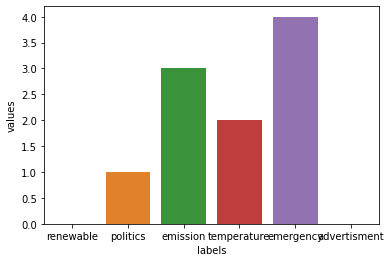

In [9]:
sns.barplot(data = df_chart
            ,x = 'labels'
            ,y = 'values'
            )